# Transformations géométriques

In [6]:
import numpy as np 
import cv2
import matplotlib.pyplot as plt

def to_gray(img_bgr):
    if img_bgr is None:
        raise ValueError("Image non trouvée")
    if img_bgr.ndim == 2:
        return img_bgr
    return cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)

def show(img, title=""):
    plt.figure(figsize=(6,5))
    if img.ndim == 2:
        plt.imshow(img, cmap="gray", vmin=0, vmax=255)
    else:
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis("off")
    plt.show()

def clip_u8(x):
    return np.clip(x, 0, 255).astype(np.uint8)

def get_pixel_safe(gray, x, y):
    H, W = gray.shape 
    if 0 <= x < W and 0 <= y < H:
        return float(gray[y, x])
    return 0.0

## Exercice 1 : Transposée d'une image

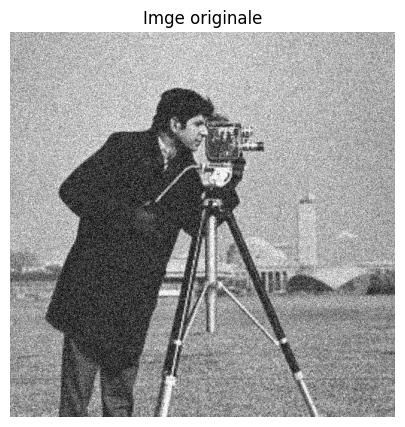

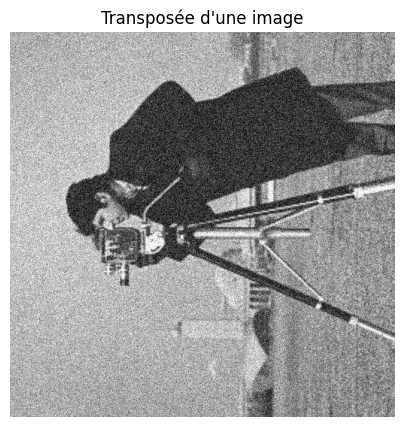

In [7]:
import cv2 
import numpy as np

def transposee_image(gray):
    H, W = gray.shape
    out = np.zeros((W, H), dtype=gray.dtype)
    for y in range(H):
        for x in range(W):
            out[x, y] = gray[y, x]
    return out

img = cv2.imread("img/camera_bruit_gaussien.png")
gray = to_gray(img)

t = transposee_image(gray)
show(gray, title="Imge originale")
show(t, title="Transposée d'une image")

## Exercice 2 : Agrandisssement d'image et interpolation par plus proche voisin

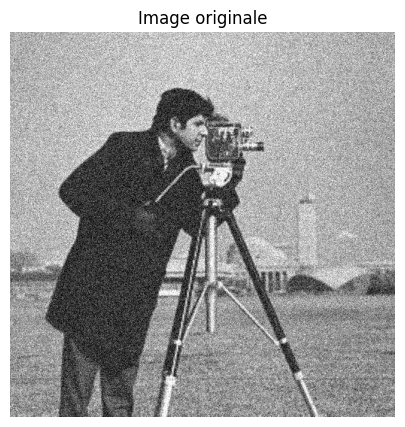

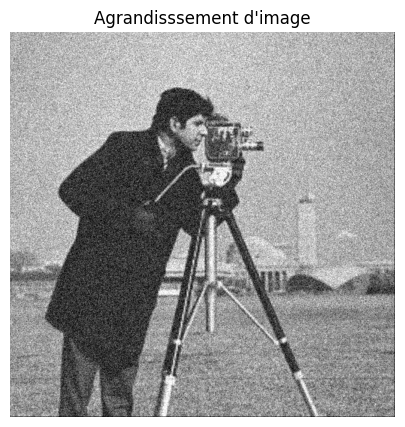

Image originale: (512, 512)
Aggrandissement d'image: (1024, 1024)


In [8]:
import cv2
import numpy as np 

def interpolate_nearest(gray, x, y):
    Xi = int(np.floor(x + 0.5))
    Yi = int(np.floor(y + 0.5))
    return get_pixel_safe(gray, Xi, Yi)

def expansion( gray, scale, interpolate):
    H, W = gray.shape
    newh = int(np.round(H * scale))
    neww = int(np.round(W * scale))

    out = np.zeros((newh, neww), dtype=np.uint8)

    for Y in range(newh):
        for X in range(neww):
            x = X / scale
            y = Y / scale
            out[Y, X] = clip_u8(interpolate(gray, x, y))
    return out 

img = cv2.imread("img/camera_bruit_gaussien.png")
gray = to_gray(img)

big_img = expansion(gray, scale=2.0, interpolate=interpolate_nearest)

show(gray, title="Image originale")
show(big_img, title="Agrandisssement d'image")

print("Image originale:", gray.shape)
print("Aggrandissement d'image:", big_img.shape)


## Exercice 3 : Agrandisssement d'image et interpolation bilinéaire

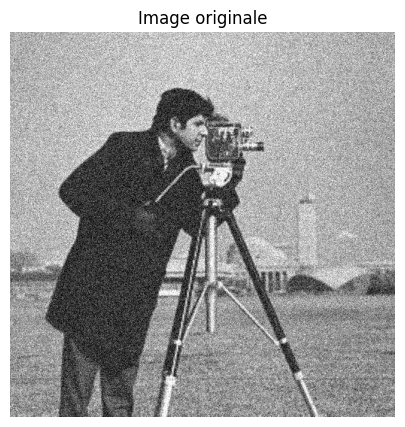

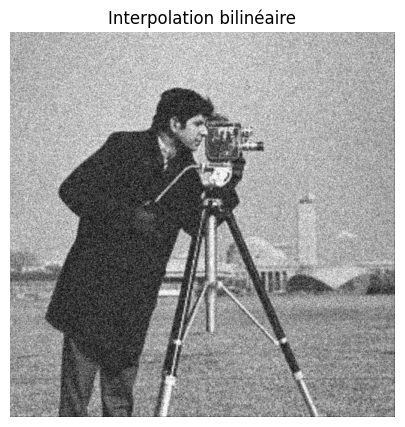

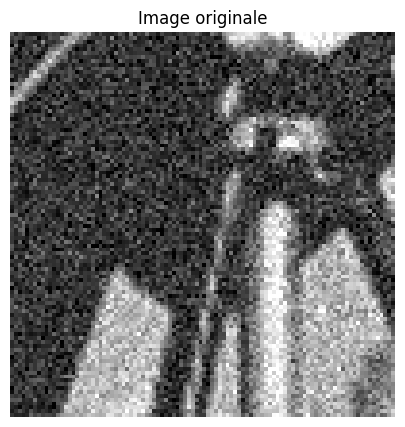

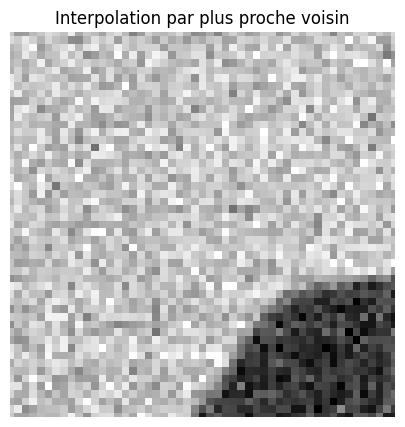

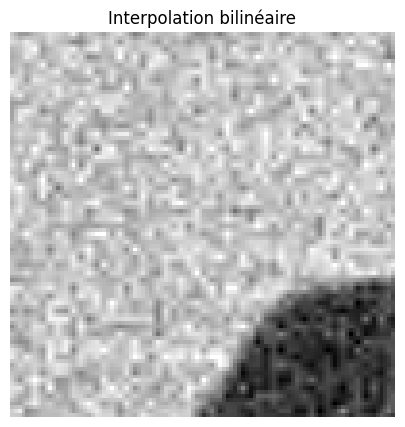

In [9]:
import cv2
import numpy as np

def interpolate_bilanear(gray, x, y):
    x1 = int(np.floor(x))
    y1 = int(np.floor(y))

    x2 = x1 + 1
    y2 = y1 + 1

    a = x - x1 # Alpha
    b = y - y1 # Beta

    f11 = get_pixel_safe(gray, x1, y1)
    f21 = get_pixel_safe(gray, x2, y1)
    f12 = get_pixel_safe(gray, x1, y2)
    f22 = get_pixel_safe(gray, x2, y2)

    valeur = (1-a)*(1-b)*f11 + a*(1-b)*f21 + (1-a)*b*f12 + a*b*f22
    return valeur

img = cv2.imread("img/camera_bruit_gaussien.png")
gray = to_gray(img)

big_bi = expansion(gray, scale=2.0, interpolate=interpolate_bilanear)
show(gray, title="Image originale")
show(big_bi, title="Interpolation bilinéaire")

show(gray[200:300, 200:300], title="Image originale")
show(big_img[200:300, 200:300], title="Interpolation par plus proche voisin")
show(big_bi[200:300, 200:300], title="Interpolation bilinéaire")


## Exercice 4 : Rotation

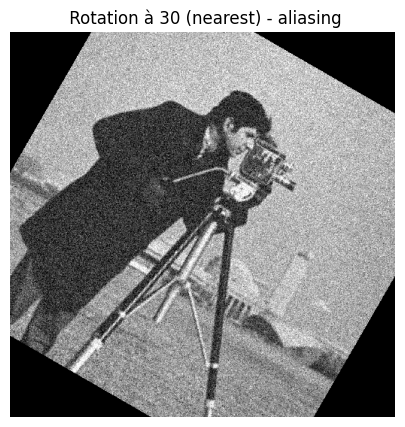

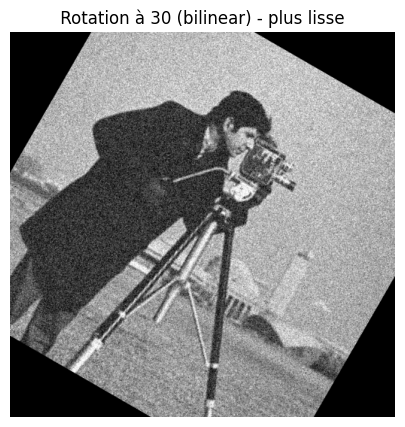

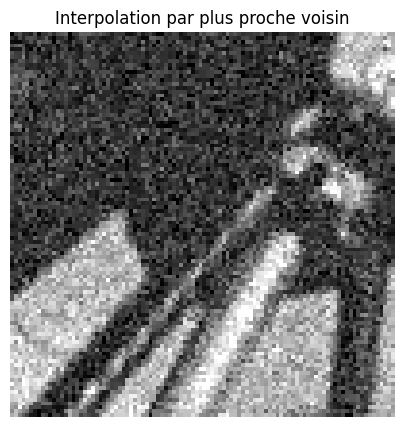

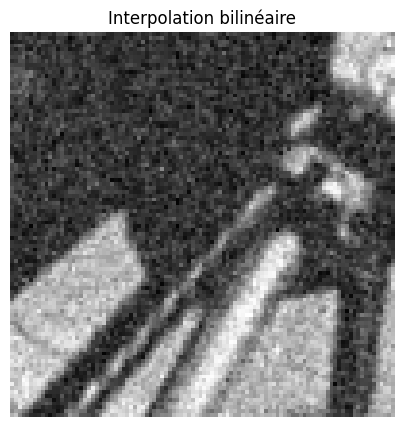

In [5]:
def rotation(gray, angle_degres, interpolate):
    H, W = gray.shape
    out = np.zeros((H, W), dtype=np.uint8)

    theta = np.deg2rad(angle_degres)
    c = np.cos(theta)
    s = np.sin(theta)

    cx = (W-1) / 2.0
    cy = (H-1) / 2.0

    for Y in range(H):
        for X in range(W):
            # coordonnées au centre
            Xc = X - cx
            Yc = Y - cy

            # inversion des rotations 
            x = c*Xc + s*Yc + cx
            y = -s*Xc + c*Yc + cy

            out[Y, X] = clip_u8(interpolate(gray, x, y))
    return out

img = cv2.imread("img/camera_bruit_gaussien.png")
gray = to_gray(img)

rotation_near = rotation(gray, angle_degres=30, interpolate=interpolate_nearest)
rotation_bilin = rotation(gray, angle_degres=30, interpolate=interpolate_bilanear)

show(rotation_near, title=" Rotation à 30 (nearest) - aliasing")
show(rotation_bilin, title=" Rotation à 30 (bilinear) - plus lisse ")

show(rotation_near[200:300, 200:300], title="Interpolation par plus proche voisin")
show(rotation_bilin[200:300, 200:300], title="Interpolation bilinéaire")

